# AMPERE

Testing for AMPERE plotting and fitting for deriving new indicies.

In [1]:
import os, sys
import pandas as pd
import numpy as np

#add read_io module to current path
file_path = '../../DataIO/'
sys.path.append(os.path.dirname(file_path))

In [2]:
import data_io as dio

In [3]:
amp_dat = dio.load_ampere(local_dir="E:\AMPERE")

Temporarily extracting ampere.20120623.k060_m08.north.grd.nc from E:\AMPERE\2012\ampere.201206.k060_m08.north.grd-007.zip to current dir


In [169]:
# code for the polar histogram plot

import matplotlib.pyplot as plt
import matplotlib.colors as cols
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import numpy as np

def polar_hist(theta: np.array or list,
                height: np.array or list,
                width: np.array or list or float,
                bottom: np.array or list or float,
                z: np.array or list = None,
                ax=None,
                fig=None,
                theta_offset: float =-0.5*np.pi,
                rlim= None,
                **kwargs):

    # convert input arrays to numpy arrays
    if not isinstance(theta, np.ndarray):
        theta = np.array(theta)
    if not isinstance(height, np.ndarray):
        height = np.array(height)
    if not isinstance(width, np.ndarray):
        width = np.array(width)
    if not isinstance(bottom, np.ndarray):
        bottom = np.array(bottom)

    # make sure the passed arrays are the correct size
    if (theta.shape != height.shape) and (height.size != 1):
        raise ValueError('theta and height must be the same shape')
    if (width.shape != theta.shape) and (width.size != 1):
        raise ValueError('width must be same shape as theta and height, or 1 element')
    if (bottom.shape != theta.shape) and (bottom.size != 1):
        raise ValueError('bottom must be same shape as theta and height, or 1 element')
    
    # if the arrays are None or size 1 get them to match
    # the shape of theta for plotting
    if z is None:
        z = np.ones_like(theta)
    if height.size == 1:
        height = np.full_like(theta,height)
    if width.size == 1:
        width = np.full_like(theta,width)  
    if bottom.size == 1:
        bottom = np.full_like(theta,bottom)  
    
    # check if an axis and figure are passed
    # if not grab the current ones
    if ax is None:
        # get current axis if none is passed
        ax = plt.gca()
    if fig is None:
        fig = plt.gcf()
    
    # check if the current axis is polar
    # if not change it to polar by deleting
    # it and adding another
    if ax.name != 'polar':
        rows, cols, start, stop = ax.get_subplotspec().get_geometry()
        ax.remove()
        ax = fig.add_subplot(rows, cols, start+1, projection='polar')

    # create a set of rectagles
    # which will plot as wedges in polar plots
    rects = []
    for x, y, h, w in zip(theta, bottom, height, width):
        rects.append(Rectangle((x,y), w, h))
    
    # add them to the patch and axis
    coll = PatchCollection(rects, array=z, **kwargs)
    ax.add_collection(coll)
    
    #this plots an earth of raidus 1 with the night side in black
    #ax.bar(-0.5*np.pi,1,np.pi,align='edge',facecolor='black')
    #ax.bar(0.5*np.pi,1,np.pi,align='edge',facecolor='white',edgecolor='black')

    # set axis limits
    ax.set_xlim([0,2*np.pi])
    if rlim:
        ax.set_ylim(rlim)
    else:
        rlim = [0,(bottom+height).max()]
        ax.set_ylim(rlim)

    # set some simple ticks
    ax.xaxis.set_ticks(np.radians(np.arange(0,360,90)))
    ax.set_xticklabels(np.degrees(ax.get_xticks())*24./360.)
    
    # rotate the axis if needed
    ax.set_theta_offset(theta_offset)

    # add color bar
    cbar = fig.colorbar(coll,pad=0.1, ax=ax, **kwargs)

    return ax

In [167]:
# min is 0.2
tt = 600
print(amp_dat['time'][tt])
theta = np.deg2rad((amp_dat['mlt_hr'][tt,:]-0.5)*360/24.)
bottom = amp_dat['cLat_deg'][tt,:]
z = amp_dat['jPar'][tt,:]

z[np.where(np.abs(z) < 0.2)] = 0

2012-06-23 20:00:00


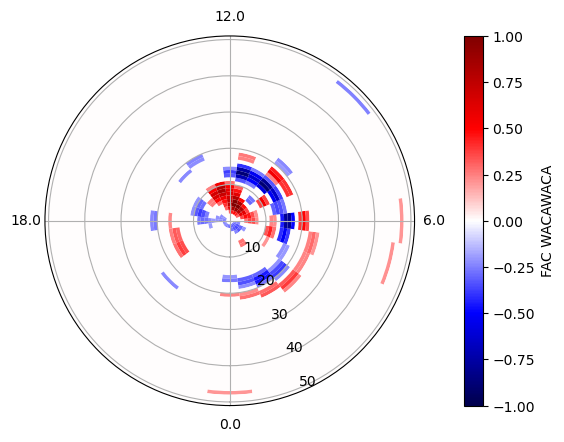

In [168]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
cmap = plt.get_cmap('seismic')

coll = polar_hist(theta=theta,height=1,width=np.deg2rad(360/24.), bottom=bottom, z=z,
                   ax=ax, cmap=cmap, norm=cols.Normalize(vmin=-1,vmax=1),
                   label='FAC WACAWACA')

plt.show()